### Column Description

1. geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.

2. count_floors_pre_eq (type: int): number of floors in the building before the earthquake.

3. age (type: int): age of the building in years.

4. area_percentage (type: int): normalized area of the building footprint.

5. height_percentage (type: int): normalized height of the building footprint.

6. land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.

7. foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.

8. roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.

9. ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.

10. other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

11. position (type: categorical): position of the building. Possible values: j, o, s, t.

12. plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

13. has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.

14. has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

15. has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.

16. has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

17. has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

18. has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

19. has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.

20. has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.

21. has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

22. has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.

23. has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.

24. legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.

25. count_families (type: int): number of families that live in the building.

26. has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.

27. has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.

28. has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.

29. has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.

30. has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.

31. has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.

32. has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.

33. has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.

34. has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.

35. has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.

36. has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

#### IMPORT LIBRARIES

In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score

#### IMPORT DATA

In [2]:
train_values = pd.read_csv('./Dataset/Modeling Earthquake Damage/train_values.csv')
train_labels = pd.read_csv('./Dataset/Modeling Earthquake Damage/train_labels.csv')
test_values = pd.read_csv('./Dataset/Modeling Earthquake Damage/test_values.csv')
submission_format = pd.read_csv('./Dataset/Modeling Earthquake Damage/submission_format.csv')

In [3]:
#define function to displaying all row in data

def display_all(df):
    with pd.option_context('display.max_rows', None):
        with pd.option_context('display.max_columns', None):
            display(df)

In [4]:
display_all(train_values.head())

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
display_all(train_labels.head())

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


#### MERGING TRAIN DATA

In [6]:
train_joined = pd.merge(train_values, 
                        train_labels)
#check
display_all(train_joined.head())

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


#### EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
#summarize all column in train_joined data
def summary(df):
    print("summary")
    print("------------------------------")
    print(df.describe())
    print("------------------------------")
    print("columns types")
    print(df.dtypes)
    print("------------------------------")
    print("shape")
    print(df.shape)
    
summary(train_joined)

summary
------------------------------
        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  2.606010e+05   260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       13.900353      701.074685     6257.876148   
std    3.045450e+05        8.033617      412.710734     3646.369645   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.611900e+05        7.000000      350.000000     3073.000000   
50%    5.257570e+05       12.000000      702.000000     6270.000000   
75%    7.897620e+05       21.000000     1050.000000     9412.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  height_percentage  \
count        260601.000000  260601.000000    260601.000000      260601.000000   
mean              2.129723      26.535029         8.018051           5.434365   
std               0.727665      73.565937         4.392231           1.918418 

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'damage_grade'),
 Text(0.5, 1.0, 'Countplot of Damage Grade')]

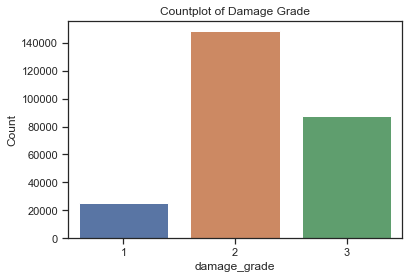

In [8]:
#damage_grade countplot
sns.set(style="ticks", color_codes=True)
ax = sns.countplot(train_joined["damage_grade"])
ax.set(ylabel='Count', 
       xlabel='damage_grade', 
       title='Countplot of Damage Grade')

Based on the graph above, it can be concluded that the damage to the building is not balanced, where the least damage to the building is level 1 and the most is level 2.

[Text(0.5, 1.0, 'Correlation Between Features')]

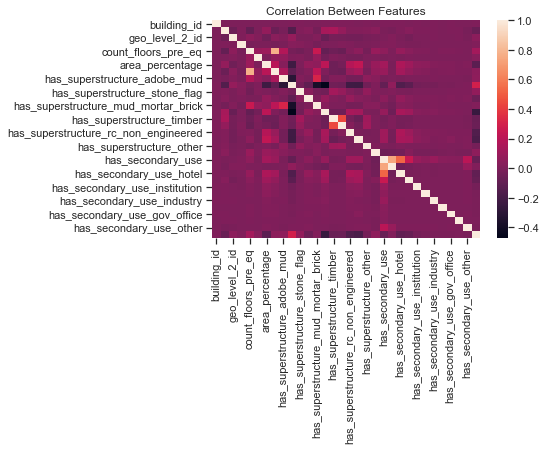

In [9]:
#correlation between features
sns.set(style="ticks", color_codes=True)
ax = sns.heatmap(train_joined.corr())
ax.set(title = 'Correlation Between Features')

In [10]:
#Correlation any features to damage_grade

#define numerical columns
train_numerical = train_joined[train_joined.dtypes[train_joined.dtypes != "object"].index]

#defining correlation
corr_0 = train_numerical.corr()
corr_0.sort_values(["damage_grade"], 
                   ascending = False, 
                   inplace = True)
corr_0.damage_grade

damage_grade                              1.000000
has_superstructure_mud_mortar_stone       0.291325
count_floors_pre_eq                       0.122308
has_superstructure_stone_flag             0.066039
count_families                            0.056151
has_superstructure_adobe_mud              0.055314
height_percentage                         0.048130
geo_level_2_id                            0.043161
age                                       0.029273
has_superstructure_mud_mortar_brick       0.014561
has_secondary_use_agriculture             0.011309
geo_level_3_id                            0.007932
building_id                               0.001063
has_secondary_use_use_police             -0.001656
has_secondary_use_health_post            -0.008543
has_secondary_use_gov_office             -0.009378
has_secondary_use_industry               -0.011024
has_secondary_use_school                 -0.011692
has_secondary_use_other                  -0.016334
has_secondary_use_institution  

Based on the graphs and data above, it can be seen that there are several positive correlations and some negative correlations to the building damage column but the correlation is not strong.

[Text(0.5, 0, 'age'), Text(0.5, 1.0, 'Distribuion of Age Column')]

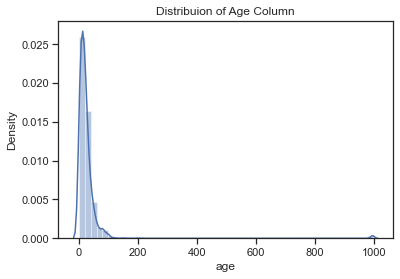

In [11]:
#age distribution
sns.set(style="ticks", color_codes=True)
ax = sns.distplot(train_joined["age"])
ax.set(xlabel='age', 
       title='Distribuion of Age Column')

Based on the distribution chart above, most buildings are between 0 to 100 years old, but there are some buildings that are more than 100 years old.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'damage_grade'),
 Text(0.5, 1.0, 'Countplot of Damage Grade (New Building)')]

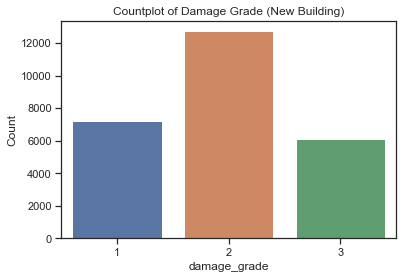

In [12]:
#checking builing condition that has 0 year age
new_building = train_joined[train_joined["age"] == 0]

#damage_grade countplot for new building
sns.set(style="ticks", color_codes=True)
ax = sns.countplot(new_building["damage_grade"])
ax.set(ylabel='Count', 
       xlabel='damage_grade', 
       title='Countplot of Damage Grade (New Building)')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'damage_grade'),
 Text(0.5, 1.0, 'Countplot of Damage Grade (Ancient Building)')]

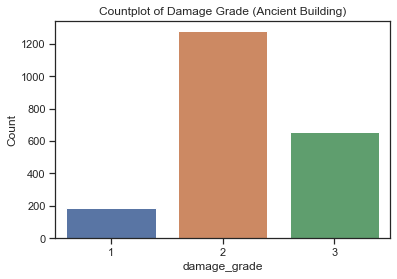

In [13]:
#checking builing condition that has 0 year age
ancient_building = train_joined[train_joined["age"] > 100]

#damage_grade countplot for new building
sns.set(style="ticks", color_codes=True)
ax = sns.countplot(ancient_building["damage_grade"])
ax.set(ylabel='Count', 
       xlabel='damage_grade', 
       title='Countplot of Damage Grade (Ancient Building)')

Compare to another buildings that has different age

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'damage_grade'),
 Text(0.5, 1.0, 'Countplot of Damage Grade (0-100 years old building)')]

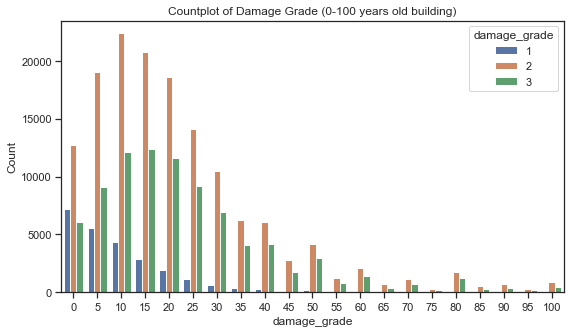

In [14]:
#damage_grade countplot for other building

#querying based on age
other_building = train_joined[train_joined["age"] <= 100]

sns.set(style="ticks", 
        color_codes=True,
       rc={'figure.figsize':(9,5)})

ax = sns.countplot(other_building["age"],
                hue = other_building ["damage_grade"])
ax.set(ylabel='Count', 
       xlabel='damage_grade', 
       title='Countplot of Damage Grade (0-100 years old building)')

Building damages level looks very imbalanced. As we can see that as the building ages, the first level damage will be less and only new buildings have a damage rate of one greater than a level of three damage. 

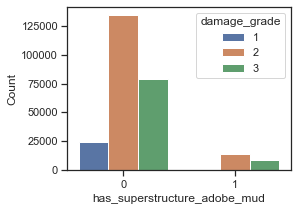

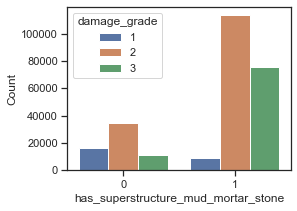

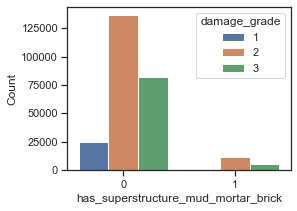

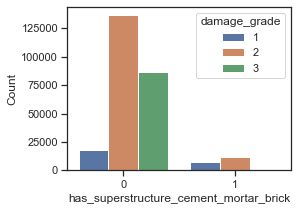

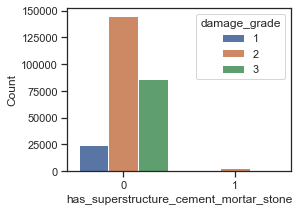

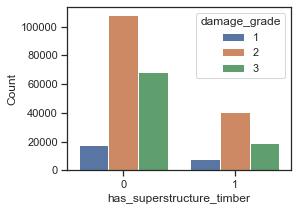

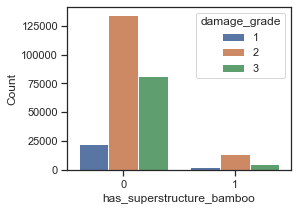

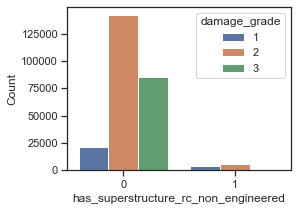

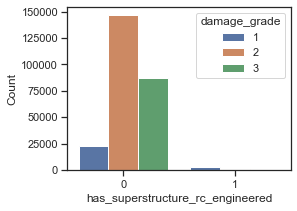

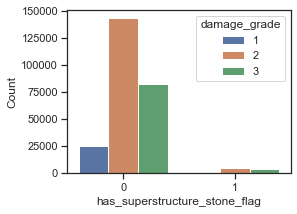

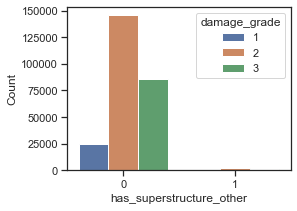

In [15]:
cols=['has_superstructure_adobe_mud',
      'has_superstructure_mud_mortar_stone',
      'has_superstructure_mud_mortar_brick',       
      'has_superstructure_cement_mortar_brick',   
      'has_superstructure_cement_mortar_stone',  
      'has_superstructure_timber',
      'has_superstructure_bamboo',
      'has_superstructure_rc_non_engineered',
      'has_superstructure_rc_engineered',
      'has_superstructure_stone_flag',
      'has_superstructure_other']

for i in cols:
    sns.set(style="ticks", 
        color_codes=True,
       rc={'figure.figsize':(4,3)})
    ax = sns.countplot(train_joined[i],
                hue = train_joined["damage_grade"])
    ax.set(ylabel='Count', 
           xlabel=i)
    plt.show()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Foundation Type'),
 Text(0.5, 1.0, 'Countplot of Damage Grade (Foundation Type)')]

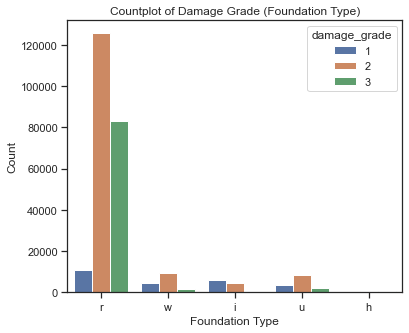

In [16]:
#damage countplot grouped by foundation type
sns.set(style="ticks", 
        color_codes=True,
       rc={'figure.figsize':(6,5)})

ax = sns.countplot(train_joined["foundation_type"],
                hue = train_joined["damage_grade"])
ax.set(ylabel='Count', 
       xlabel='Foundation Type', 
       title='Countplot of Damage Grade (Foundation Type)')

Foundation type r is the type of foundation that is most widely used and has the most damage to the third degree, while the type of foundation i is the type of foundation that has the least percentage of damage to the third degree compared to other types of foundations.


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Roof Type'),
 Text(0.5, 1.0, 'Countplot of Damage Grade (Roof Type)')]

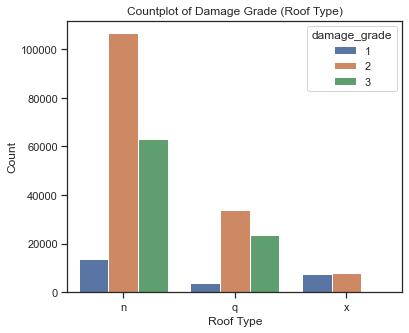

In [17]:
#damage countplot grouped by roof type
sns.set(style="ticks", 
        color_codes=True,
       rc={'figure.figsize':(6,5)})

ax = sns.countplot(train_joined["roof_type"],
                hue = train_joined["damage_grade"])
ax.set(ylabel='Count', 
       xlabel='Roof Type', 
       title='Countplot of Damage Grade (Roof Type)')

Roof type n is the type of roof that is most often used in the analyzed buildings where the level of damage is dominated by second-level damage, while based on the graph above, the strongest type of roof is type x because there is almost no third-level damage to this type of roof.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Floor Count'),
 Text(0.5, 1.0, 'Countplot of Damage Grade (Floor Count)')]

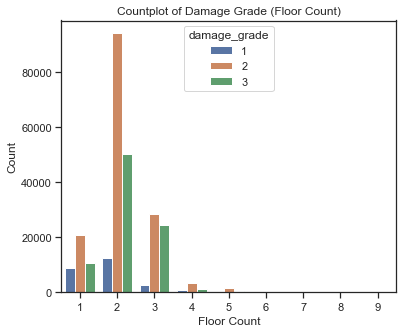

In [18]:
#damage countplot grouped by how many floor at building before earthquake happened
sns.set(style="ticks", 
        color_codes=True,
       rc={'figure.figsize':(6,5)})

ax = sns.countplot(train_joined["count_floors_pre_eq"],
                hue = train_joined["damage_grade"])
ax.set(ylabel='Count', 
       xlabel='Floor Count', 
       title='Countplot of Damage Grade (Floor Count)')

Based on the graph above, it can be concluded that the average building has two floors where taller buildings have a higher percentage of third-level damage and less first-level damage. This indicates that the taller the building, the greater the chance that the building will have a higher level of damage.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Land Surface Condition'),
 Text(0.5, 1.0, 'Countplot of Damage Grade (Land Surface Condition)')]

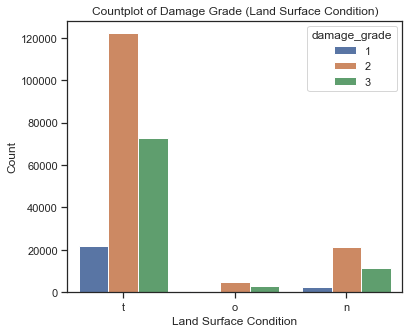

In [19]:
#damage countplot grouped by land surface condition
sns.set(style="ticks", 
        color_codes=True,
       rc={'figure.figsize':(6,5)})

ax = sns.countplot(train_joined["land_surface_condition"],
                hue = train_joined["damage_grade"])
ax.set(ylabel='Count', 
       xlabel='Land Surface Condition', 
       title='Countplot of Damage Grade (Land Surface Condition)')

Surface soil conditions are dominated by t conditions where the highest level of damage is at level two and soil conditions are at least o soil conditions where there is only second-level damage and third-level damage which can be concluded that the soil conditions are o worse than other soil conditions.

#### DATA CLEANING

In [20]:
#def function to get missing values
def get_missing_value(df):
    mis_val = df.isnull().sum()
    tot_val = df.shape[0]
    mis_percentage = round((100 * mis_val / tot_val),
                           2)
    miss_tab = pd.concat([mis_val, mis_percentage], 
                         axis=1)
    miss_tab_col_name = miss_tab.rename(columns = {0 : 'Row With Missing Value', 
                                                   1 : 'Percentage (%)'})
    miss_tab_col_name = miss_tab_col_name.sort_values('Percentage (%)',ascending=False)
    return miss_tab_col_name

#checking missing values on train and test data
get_missing_value(train_joined)
get_missing_value(test_values)

,Row With Missing Value,Percentage (%)
building_id,0,0.0
has_secondary_use_agriculture,0,0.0
has_superstructure_bamboo,0,0.0
has_superstructure_rc_non_engineered,0,0.0
has_superstructure_rc_engineered,0,0.0
has_superstructure_other,0,0.0
legal_ownership_status,0,0.0
count_families,0,0.0
has_secondary_use,0,0.0
has_secondary_use_hotel,0,0.0


Conclusion : The quality of the available data is quite good, There are no missing values in train and test dataset

In [21]:
#checking single unique values for all columns
for i in train_joined.columns:
    if len(train_joined[i].unique()) == 1:
        print(i)
    else:
        pass

Conclusion : There are no columns with single unique values in train and test dataset, We can continue the analysis process to the creation of a data model.

#### MODELLING

In [22]:
#checking numerical column
train_numerical.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,0,3


##### DATA SPLITTING

In [23]:
X = train_joined.drop(columns = ["building_id", "damage_grade"],
                     axis = 1)
y = train_joined["damage_grade"]

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = 0.1,
                                                 random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((234540, 38), (26061, 38), (234540,), (26061,))

##### PREPROCESSING

preprocessing is divided into two, namely preprocessing for the object or category column and preprocessing for the number column, then the two pipelines will be combined.

In [25]:
#for category/object columns
cat_pipeline = Pipeline([
    ('One Hot Encoder', OneHotEncoder(handle_unknown='ignore'))
])

#for numerical columns
num_pipelines = Pipeline([
    ('Standard Scaler', StandardScaler())
])

In [26]:
#combining two pipelines
#define num_features and obj_features
obj_features = X[X.dtypes[X.dtypes == "object"].index].columns
num_features = X[X.dtypes[X.dtypes != "object"].index].columns
print("object features :")
print(obj_features)
print("numerical features :")
print(num_features)

#preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('Numerical', num_pipelines, num_features),
        ('Categorical', cat_pipeline, obj_features)  
    ],
    remainder = "drop"
)

object features :
Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')
numerical features :
Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', '

In [27]:
#fitting preprocessing pipeline
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep =  preprocessor.transform(X_val)

#checking shape
print ('X_train_prep.shape' , X_train_prep.shape)
print ('X_eval_prep.shape' , X_val_prep.shape)

X_train_prep.shape (234540, 68)
X_eval_prep.shape (26061, 68)


##### MODEL BUILD AND FITTING

First, we will create a very simple model first, then if necessary, hyperparameter tuning will be carried out to improve the model to make it more accurate in predicting the data.

In [28]:
#model_1 = RandomForestClassifier

#model building and fitting
model_1 = RandomForestClassifier()
model_1.fit(X_train_prep, y_train)

#predicting validation data
model_1_pred = model_1.predict(X_val_prep)

#checking model accuracy score
print(accuracy_score(y_val, model_1_pred))
print(f1_score(y_val, model_1_pred, average=None))

0.7148229154675569
[0.55465221 0.768652   0.65296974]


In [ ]:
#look for model_1 parameter
model_1

In [29]:
#model_2 = KNeighborsClassifier

#model building and fitting
model_2 = KNeighborsClassifier()
model_2.fit(X_train_prep, y_train)

#predicting validation data
model_2_pred = model_2.predict(X_val_prep)

#checking model accuracy score
print(accuracy_score(y_val, model_2_pred))
print(f1_score(y_val, model_2_pred, average=None))

0.6554621848739496
[0.49546579 0.71859508 0.58401902]


In [ ]:
#look for model_2 parameter
model_2

In [31]:
#model_3 = XGBClassifier

#model building and fitting
model_3 = XGBClassifier()
model_3.fit(X_train_prep, y_train)

#predicting validation data
model_3_pred = model_3.predict(X_val_prep)

#checking model accuracy score
print(accuracy_score(y_val, model_3_pred))
print(f1_score(y_val, model_3_pred, average=None))

[20:26:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.727600629292813
[0.54864281 0.78292013 0.66037251]


In [ ]:
#look for model_3 parameter
model_3

##### OPTIMIZING (TUNING)

Based on the three basic models that have been carried out, 2 models with the highest accuracy were taken, namely RandomForestClassifier model and XGBClassifier model.

RandomForestClassifier

In [35]:
#tuning RandomForestClassifier model

#define parameter for RandomForestClassifier
params_1 = {'n_estimators':[2, 5, 10, 20, 50, 75, 150],
        'criterion':['gini', 'entropy'],
        'max_depth':[2, 5, 10, 20, 50, None],
        'min_samples_split':[2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
        'max_features': ['auto', 'sqrt'],
         }

rf = RandomForestClassifier()

random_search_1 = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=params_1, 
                                   scoring='accuracy', 
                                   verbose=10,
                                   cv = 5)
random_search_1.fit(X_train_prep, y_train)

print(random_search_1.best_estimator_)
print(random_search_1.best_params_)
print(random_search_1.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False, score=0.571, total=   1.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False, score=0.569, total=   1.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False, score=0.569, total=   1.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False, score=0.569, total=   1.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, criterion=gini, bootstrap=False, score=0.569, total=   1.1s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False, score=0.569, total=  15.4s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.2s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False, score=0.569, total=  15.7s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   37.0s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False, score=0.569, total=  16.7s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   53.7s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False, score=0.569, total=  16.4s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.2min remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, criterion=entropy, bootstrap=False, score=0.569, total=  15.0s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=gini, bootstrap=False 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=gini, bootstrap=False, score=0.718, total=  12.8s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=gini, bootstrap=False 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=gini, bootstrap=False, score=0.714, total=  11.9s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=gini, bootstrap=False 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=gini, bootstr

[CV]  n_estimators=75, min_samples_split=20, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False, score=0.693, total=  37.8s
[CV] n_estimators=75, min_samples_split=20, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False 
[CV]  n_estimators=75, min_samples_split=20, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False, score=0.691, total=  37.7s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, bootstrap=True, score=0.700, total=   4.4s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 20.1min finished


RandomForestClassifier(max_depth=50, min_samples_split=10, n_estimators=150)
{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': True}
0.7225377334356613


In [36]:
#predicting validation data with optimized rf model
rf_val = random_search_1.predict(X_val_prep)

#optimized model accuracy
accuracy_score(y_val, rf_val)

0.7265645984421166

XGBClassifier

In [47]:
#tuning XGBClassifier model

#define parameter for XGBClassifier
params_2 = {'n_estimators':[10, 50, 100, 200, 400, 600, 800, 1000],
            'learning_rate':[0.03, 0.01, 0.05, 0.1, 0.5],
            'max_depth':[5, 10, 15, 30, 45, 60, 75, 90, 100],
            'min_child_weight': [1, 2, 3, 4, 5, 6],
            'gamma' : [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
            'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
            'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200]
         }

xgb = XGBClassifier()

random_search_2 = RandomizedSearchCV(estimator=xgb, 
                                   param_distributions=params_2, 
                                   scoring='accuracy', 
                                   verbose=10,
                                   cv = 4)
random_search_2.fit(X_train_prep, y_train)

print(random_search_2.best_estimator_)
print(random_search_2.best_params_)
print(random_search_2.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] reg_lambda=51.2, reg_alpha=0.4, n_estimators=100, min_child_weight=1, max_depth=90, learning_rate=0.5, gamma=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[22:39:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=51.2, reg_alpha=0.4, n_estimators=100, min_child_weight=1, max_depth=90, learning_rate=0.5, gamma=200, score=0.661, total= 4.9min
[CV] reg_lambda=51.2, reg_alpha=0.4, n_estimators=100, min_child_weight=1, max_depth=90, learning_rate=0.5, gamma=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min remaining:    0.0s


[22:44:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=51.2, reg_alpha=0.4, n_estimators=100, min_child_weight=1, max_depth=90, learning_rate=0.5, gamma=200, score=0.659, total= 4.6min
[CV] reg_lambda=51.2, reg_alpha=0.4, n_estimators=100, min_child_weight=1, max_depth=90, learning_rate=0.5, gamma=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.5min remaining:    0.0s


[22:49:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=51.2, reg_alpha=0.4, n_estimators=100, min_child_weight=1, max_depth=90, learning_rate=0.5, gamma=200, score=0.660, total= 4.7min
[CV] reg_lambda=51.2, reg_alpha=0.4, n_estimators=100, min_child_weight=1, max_depth=90, learning_rate=0.5, gamma=200 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 14.2min remaining:    0.0s


[22:53:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=51.2, reg_alpha=0.4, n_estimators=100, min_child_weight=1, max_depth=90, learning_rate=0.5, gamma=200, score=0.663, total= 4.9min
[CV] reg_lambda=1.6, reg_alpha=1.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=0.1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 19.0min remaining:    0.0s


[22:58:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=1.6, reg_alpha=1.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=0.1, score=0.721, total=21.5min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 40.6min remaining:    0.0s


[CV] reg_lambda=1.6, reg_alpha=1.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=0.1 
[23:20:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=1.6, reg_alpha=1.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=0.1, score=0.721, total=20.9min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 61.4min remaining:    0.0s


[CV] reg_lambda=1.6, reg_alpha=1.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=0.1 
[23:41:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=1.6, reg_alpha=1.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=0.1, score=0.725, total=20.9min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 82.4min remaining:    0.0s


[CV] reg_lambda=1.6, reg_alpha=1.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=0.1 
[00:02:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=1.6, reg_alpha=1.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.5, gamma=0.1, score=0.724, total=20.8min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 103.2min remaining:    0.0s


[CV] reg_lambda=12.8, reg_alpha=0.8, n_estimators=400, min_child_weight=6, max_depth=45, learning_rate=0.01, gamma=25.6 
[00:23:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=12.8, reg_alpha=0.8, n_estimators=400, min_child_weight=6, max_depth=45, learning_rate=0.01, gamma=25.6, score=0.704, total=13.0min
[CV] reg_lambda=12.8, reg_alpha=0.8, n_estimators=400, min_child_weight=6, max_depth=45, learning_rate=0.01, gamma=25.6 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 116.2min remaining:    0.0s


[00:35:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=12.8, reg_alpha=0.8, n_estimators=400, min_child_weight=6, max_depth=45, learning_rate=0.01, gamma=25.6, score=0.703, total=12.7min
[CV] reg_lambda=12.8, reg_alpha=0.8, n_estimators=400, min_child_weight=6, max_depth=45, learning_rate=0.01, gamma=25.6 
[00:48:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=12.8, reg_alpha=0.8, n_estimators=400, min_child_weight=6, max_depth=45, learning_rate=0.01, gamma=25.6, score=0.699, total=12.5min
[CV] reg_lambda=12.8, reg_alpha=0.8, n_estimators=400, min_child_weight=6, 

[04:46:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=51.2, reg_alpha=0.4, n_estimators=10, min_child_weight=4, max_depth=75, learning_rate=0.1, gamma=0.4, score=0.718, total=  17.4s
[CV] reg_lambda=51.2, reg_alpha=0.4, n_estimators=10, min_child_weight=4, max_depth=75, learning_rate=0.1, gamma=0.4 
[04:46:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=51.2, reg_alpha=0.4, n_estimators=10, min_child_weight=4, max_depth=75, learning_rate=0.1, gamma=0.4, score=0.717, total=  18.3s
[CV] reg_lambda=51.2, reg_alpha=0.4, n_estimators=10, min_child_weight=4, max_depth=

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 435.0min finished


[05:54:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=15, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0.4, reg_lambda=12.8,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
{'reg_lambda': 12.8, 'reg_alpha': 0.4, 'n_estimators': 600, 'm

In [48]:
#predicting validation data with optimized xgb model
xgb_val = random_search_2.predict(X_val_prep)

#optimized model accuracy
accuracy_score(y_val, xgb_val)

0.744829438624765

After hyperparameter tuning was done on both models, it turns out that the XGBClassifier model has a higher accuracy of around 0.7448 while the best model from RandomForestClassifier has an accuracy of 0.7265. So to predict the test dataset, an optimized XGB model will be used.

#### PREDICT TEST DATA

In [49]:
#preprocessing test data
X_test_prep = preprocessor.transform(test_values)

In [51]:
#predict test data
model_predict = random_search_2.predict(X_test_prep)
model_predict

array([3, 2, 2, ..., 2, 2, 1], dtype=int64)

#### SUBMISSION

In [52]:
submission_format.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3


In [53]:
submission_format["damage_grade"] = model_predict
submission_format.to_csv('modelling_earthquake_damage.csv',
                        index=False)
submission_format

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'damage_grade'),
 Text(0.5, 1.0, 'Countplot of Damage Grade')]

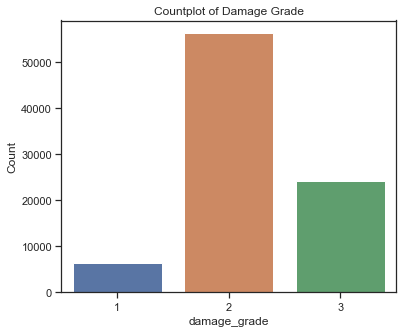

In [54]:
#damage_grade countplot
sns.set(style="ticks", color_codes=True)
ax = sns.countplot(submission_format["damage_grade"])
ax.set(ylabel='Count', 
       xlabel='damage_grade', 
       title='Countplot of Damage Grade')

Based on the prediction results, it can be concluded that the buildings in the test data are dominated by level two damage, followed by level three damage and the least damage is level one.

This prediction result gets a score of **0.7441** on DataDriven which is better than the other 93% of participants.